In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("../../ELF_master_results.csv", index_col=0)
df.head()
genus_mapping_dict = dict(zip(df.index.astype(str), df['isolate_genus']))
order_mapping_dict = dict(zip(df.index.astype(str), df['isolate_order']))
genus2class_mapping_dict = dict(zip(df['isolate_genus'], df['isolate_class']))
genus_mapping_dict

{'1': 'Trichoderma',
 '2': 'Mucor',
 '3': 'Mucor',
 '4': 'unidentified',
 '5': 'Mucor',
 '6': 'Trichoderma',
 '7': 'Psathyrella',
 '8': 'Pestalotiopsis',
 '9': 'Trichoderma',
 '10': 'Penicillium',
 '11': 'Pestalotiopsis',
 '12': 'unidentified',
 '13': 'Preussia',
 '14': 'Metarhizium',
 '15': 'Preussia',
 '16': 'unidentified',
 '17': 'Gyromitra',
 '18': 'Coniochaeta',
 '19': 'Preussia',
 '20': 'Trichoderma',
 '21': 'unidentified',
 '22': 'Preussia',
 '23': 'Ascochyta',
 '24': 'Coniochaeta',
 '25': 'Sordaria',
 '26': 'Tricharina',
 '27': 'Triangularia',
 '28': 'Terfezia',
 '29': 'Penicillium',
 '30': 'Neopyrenochaeta',
 '31': 'Penicillium',
 '32': 'Coniochaeta',
 '33': 'Xylaria',
 '34': 'unidentified',
 '35': 'Neurospora',
 '36': 'Neurospora',
 '37': 'Antrelloides',
 '38': 'Gyromitra',
 '39': 'Dictyospora',
 '40': 'Plectania',
 '41': 'Amphirosellinia',
 '42': 'unidentified',
 '43': 'Helminthosporium',
 '44': 'unidentified',
 '45': 'Paecilomyces',
 '46': 'Gelasinospora',
 '47': 'Paecilomy

In [7]:
def mean_merge(x):
    # Convert non-null values to numeric type
    x_numeric = pd.to_numeric(x, errors='coerce')
    # Calculate the mean of non-null values
    avg = x_numeric.mean()
    # Return the calculated average as a string
    return avg

def sum_merge(x):
    # Convert non-null values to numeric type
    x_numeric = pd.to_numeric(x, errors='coerce')
    # Calculate the mean of non-null values
    avg = x_numeric.sum()
    # Return the calculated average as a string
    return avg

# Prepare plots of pangenomics data for ELF
### CAZymes
These proteins are those involved in carbohydrate metabolism. Certain species with particular life styles may have different sets of these proteins due to differences in their life strategy.
- AA, auxiliary activity; CBM, carbohydrate-binding module; CE, carbohydrate esterase; GH, glycoside hydrolase; GT, glycosyltransferase; PL, polysaccharide lyase; PCWDE, plant cell wall degrading enzyme.
- glycoside hydrolase (GH) genes enriched 

Import data and map Order name in place of ELF number

In [8]:
cazymes = pd.read_csv("CAZyme.summary.results.csv", index_col=0)
cazymes_order = cazymes.rename(columns=order_mapping_dict, inplace=False)
cazymes_order = cazymes_order.loc[(cazymes != 0).any(axis=1)]
cazymes_all = pd.read_csv("CAZyme.all.results.csv", index_col=0)
cazymes_all_order = cazymes_all.rename(columns=order_mapping_dict, inplace=False)
cazymes_all_genus = cazymes_all.rename(columns=genus_mapping_dict, inplace=False)
#cazymes_all = cazymes_all.loc[(cazymes != 0).any(axis=1)]
cazymes_order 

,Hypocreales,Xylariales,Hypocreales,Sordariales,Xylariales,Eurotiales,Hypocreales,Hypocreales,Eurotiales,Pleosporales,...,Xylariales,Coniochaetales,Hypocreales,Xylariales,Xylariales,unidentified,Pezizales,Xylariales,Pleosporales,Hypocreales
AA,83,103,51,69,106,77,93,57,65,106,...,136,87,83,106,101,122,58,22,63,19
CBM,12,13,11,11,13,15,18,14,13,14,...,15,20,13,13,12,13,3,3,5,6
CE,51,58,34,34,63,59,67,34,49,66,...,75,56,61,57,59,66,40,15,21,8
GH,238,234,205,164,247,295,258,223,203,243,...,293,248,245,234,228,264,114,56,112,72
GT,66,57,70,67,58,82,82,70,79,71,...,63,76,73,57,56,63,55,16,31,29
PL,6,15,6,4,16,7,22,7,9,20,...,19,7,6,17,14,19,15,2,4,3


In [9]:
cazymes_order_avg = cazymes_order.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
#cazymes_order_avg = cazymes_order_avg.drop("unidentified", axis=1)
cazymes_order_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales,unidentified
AA,59.4,88.500000,59.466667,16.0,130.666667,48.694915,63.75,37.0,50.0,47.777778,98.565217,2.0,79.941176,69.0,43.0,14.0,90.276596,88.600000
CBM,8.4,15.333333,13.633333,5.5,16.000000,10.694915,17.25,7.0,8.0,3.222222,10.304348,3.0,11.588235,12.0,1.0,3.0,10.595745,10.466667
CE,25.4,65.000000,41.033333,20.5,78.666667,32.576271,42.75,36.5,32.0,25.777778,51.043478,4.0,36.647059,49.0,21.0,29.0,51.340426,53.200000
GH,108.2,251.000000,200.033333,95.0,270.333333,174.796610,249.75,107.5,194.0,100.333333,198.869565,30.0,163.705882,185.0,99.0,96.0,190.808511,204.933333
GT,39.2,76.000000,63.366667,46.0,69.666667,61.627119,57.75,69.0,70.0,38.444444,57.000000,19.0,61.470588,81.5,30.0,50.5,47.872340,56.133333
PL,11.4,8.166667,7.533333,4.0,23.666667,7.661017,19.00,7.0,5.0,7.111111,14.260870,2.0,4.588235,16.0,6.0,6.5,12.829787,13.466667


In [10]:
row_sum = cazymes.sum(axis=1)
row_avg = cazymes.mean(axis=1)
row_median = cazymes.median(axis=1)

# Print the row sum, average, and median on the same row
print("CAZymes summary statistics:")
print(f"Index{'':5}Count{'':5}Mean{'':5}Median{'':5}")
for index, row in cazymes.iterrows():
    #index = cazymes[i+1].index
    print(f"{index:<10}{row_sum[index]:<10}{round(row_avg[index],2):<10}{row_median[index]:<10}")

print("\nCAZymes Top20 genes statistics:")
all_row_sum = cazymes_all.sum(axis=1)
all_row_avg = cazymes_all.mean(axis=1)
all_row_median = cazymes_all.median(axis=1)

results = pd.DataFrame({'Row Sum': all_row_sum,
                        'Row Average': all_row_avg,
                        'Row Median': all_row_median})
results = results.sort_values(by='Row Sum', ascending=False)

results.head(20)

CAZymes summary statistics:
Index     Count     Mean     Median     
AA        16127     70.42     65.0      
CBM       2476      10.81     11.0      
CE        9644      42.11     39.0      
GH        41763     182.37    195.0     
GT        13036     56.93     63.0      
PL        2286      9.98      7.0       

CAZymes Top20 genes statistics:


,Row Sum,Row Average,Row Median
AA3,4562,19.921397,17.0
CE10,3809,16.633188,15.0
AA9,3126,13.650655,12.0
GH3,2925,12.772926,13.0
GH18,2874,12.550218,13.0
AA7,2834,12.375546,11.0
GH5,2830,12.358079,12.0
GH16,2524,11.021834,12.0
GH43,2348,10.253275,9.0
AA1,1845,8.056769,8.0


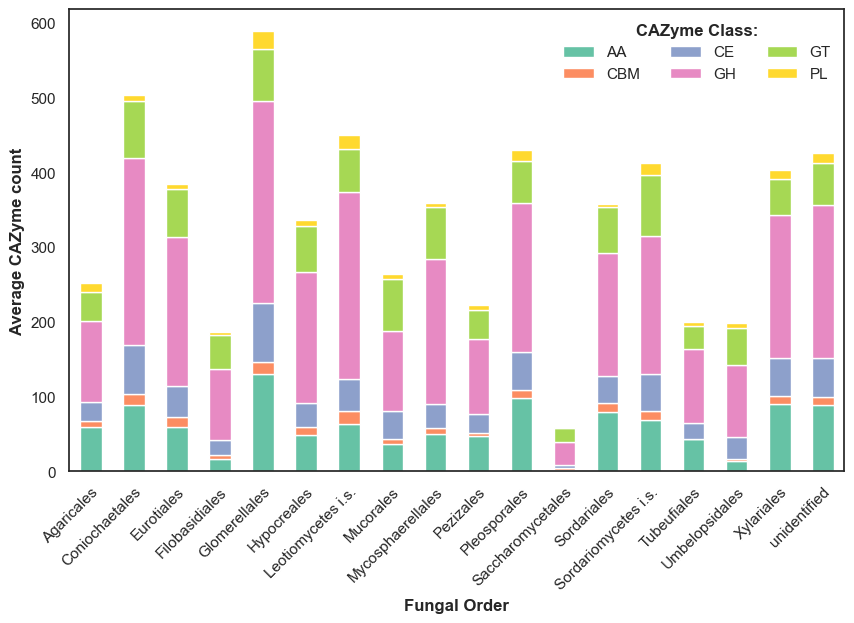

In [11]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")
sns.set_palette("Set2")
ax = cazymes_order_avg.T.plot.bar(stacked=True)
ax.legend(frameon=False, title="CAZyme Class:", title_fontproperties={'weight':"bold"}, ncols=3)
ax.set_ylabel("Average CAZyme count", fontproperties={'weight':"bold"})
ax.set_xlabel("Fungal Order", fontproperties={'weight':"bold"})
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
plt.savefig("cazyme_by_class.svg", format="svg", bbox_inches='tight')

Plot the plant associated polysaccharide CAZymes only (from Barrett et al., 2020).

In [12]:
#plant_cazymes = ["AA2","AA1","AA8","AA9","AA11","GH5","GH12","GH16","GH1","GH3","GH6","GH7","GH131","GH5","GH12","GH74","CE2","CE5","GH10","GH11","GH3","GH43","GH51","GH115","GH67","GH12","CE1","GH2","GH35","GH43","GH51","GH53","GH54","GH62","GH93","CE8","CE12","CE15","GH28","GH78","GH49","GH79","GH108","GH142","PL1","PL3","PL4","PL26"]
plant_cazymes = ["GH1","GH3","GH6","GH7","GH9","GH44","GH45","GH94","AA3","AA8","AA9","GH5","GH12","GH74","CE5","GH10","GH11","GH26","GH27","GH29","GH30","GH31","GH36","GH39","GH67","GH95","GH115","CE1","GH2","GH35","GH43","GH51","GH53","GH54","GH62","GH93","CE8","CE12","GH28","GH78","GH88","GH105","PL1","PL3","PL4","PL9","PL11"]

cazymes_all_new = cazymes_all_order[cazymes_all_order.index.isin(plant_cazymes)]
cazymes_all_avg = cazymes_all_new.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
cazymes_all_avg = cazymes_all_avg.drop("unidentified", axis=1)
cazymes_all_avg["id"] = cazymes_all_avg.index
key_func = lambda x: x.map({v: i for i, v in enumerate(plant_cazymes)})
cazymes_all_avg = cazymes_all_avg.sort_values(by='id', key=key_func)
cazymes_all_avg = cazymes_all_avg.drop("id", axis=1)
cazymes_all_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales
GH1,1.8,2.500000,3.400000,4.0,4.000000,2.355932,4.25,0.5,2.0,1.111111,2.391304,1.0,0.705882,2.5,2.0,2.0,1.553191
GH3,5.4,15.000000,15.866667,6.0,26.333333,12.542373,17.25,4.5,15.0,6.888889,11.478261,4.0,9.058824,13.0,6.0,6.0,13.574468
GH6,1.0,3.000000,0.733333,0.0,3.666667,0.796610,3.00,0.0,1.0,1.444444,2.521739,0.0,2.882353,0.0,0.0,0.5,2.191489
GH7,3.8,8.333333,2.533333,0.0,5.333333,1.932203,6.50,1.0,2.0,2.000000,3.478261,0.0,5.588235,2.0,4.0,0.0,4.191489
GH9,0.8,0.000000,0.033333,0.5,0.000000,0.000000,0.00,1.5,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.5,0.000000
GH44,1.2,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
GH45,0.0,3.333333,0.200000,0.0,2.000000,0.491525,2.75,0.5,0.0,0.555556,1.391304,1.0,1.411765,0.5,1.0,1.0,1.531915
GH94,0.0,0.500000,0.033333,0.0,0.333333,0.000000,0.25,0.0,0.0,0.000000,0.739130,0.0,0.411765,0.0,0.0,0.0,0.234043
AA3,20.4,22.166667,21.633333,3.0,39.000000,13.169492,18.50,9.0,18.0,12.111111,25.608696,0.0,17.764706,19.5,16.0,3.0,25.723404
AA8,0.6,1.666667,1.333333,0.0,5.666667,1.525424,2.25,0.5,1.0,1.777778,3.130435,0.0,2.470588,2.5,1.0,0.0,2.957447


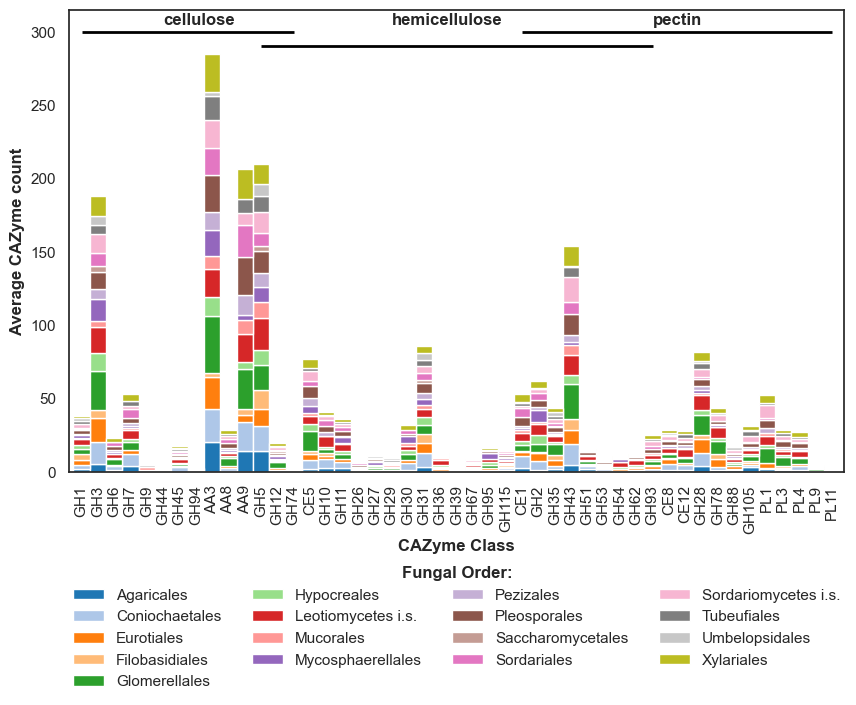

In [13]:
sns.set(style="white")
sns.set_palette("tab20")
ax = cazymes_all_avg.plot.bar(stacked=True, width=1)
ax.legend(frameon=False, title="Fungal Order:", title_fontproperties={'weight':"bold"}, loc="lower center", ncols=4, bbox_to_anchor=(0.5,-0.5))
ax.set_ylabel("Average CAZyme count", fontproperties={'weight':"bold"})
ax.set_xlabel("CAZyme Class", fontproperties={'weight':"bold"})

cellulose = ax.hlines(y=300, xmin=0, xmax=13, colors='black', linewidth=2)
plt.text(5, 305, "cellulose", fontproperties={'weight':"bold"})
hemi = ax.hlines(y=290, xmin=11, xmax=35, colors='black', linewidth=2)
plt.text(19, 305, "hemicellulose", fontproperties={'weight':"bold"})
pectin = ax.hlines(y=300, xmin=27, xmax=46, colors='black', linewidth=2)
plt.text(35, 305, "pectin", fontproperties={'weight':"bold"})
plt.savefig("pcdwes_by_class.svg", format="svg", bbox_inches='tight')

In [14]:
#cazymes_all_new = cazymes_all_new.drop("unidentified", axis=1)
cazymes_all_new["id"] = cazymes_all_new.index
key_func = lambda x: x.map({v: i for i, v in enumerate(plant_cazymes)})
cazymes_all_new = cazymes_all_new.sort_values(by='id', key=key_func)
cazymes_all_new = cazymes_all_new.drop("id", axis=1)
cazymes_all_new

C:\Users\styleske\AppData\Local\Temp\ipykernel_10924\91192493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cazymes_all_new["id"] = cazymes_all_new.index


,Hypocreales,Xylariales,Hypocreales,Sordariales,Xylariales,Eurotiales,Hypocreales,Hypocreales,Eurotiales,Pleosporales,...,Xylariales,Coniochaetales,Hypocreales,Xylariales,Xylariales,unidentified,Pezizales,Xylariales,Pleosporales,Hypocreales
GH1,3,2,2,1,2,5,4,4,4,2,...,1,3,4,2,1,1,1,0,1,1
GH3,14,14,17,9,14,26,20,14,15,16,...,15,15,15,14,12,15,9,3,11,8
GH6,3,2,1,3,2,1,1,1,1,3,...,3,3,3,2,2,3,2,0,3,0
GH7,8,5,2,5,5,4,2,2,2,3,...,6,8,8,6,5,6,3,0,2,1
GH9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GH44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GH45,2,2,1,1,2,0,1,0,0,1,...,3,2,2,2,2,2,0,2,2,1
GH94,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
AA3,17,29,17,13,29,29,26,15,24,29,...,33,19,18,29,27,31,13,4,13,3
AA8,2,4,1,2,5,1,5,1,1,5,...,5,1,1,3,5,5,2,0,1,0


In [15]:
cazymes_all_new = cazymes_all_genus[cazymes_all_genus.index.isin(plant_cazymes)]
cazymes_all_new = cazymes_all_new.loc[(cazymes_all_new != 0).any(axis=1)]
cazymes_all_new

,Trichonectria,Anthostomelloides,Trichoderma,Gelasinospora,Nemania,Penicillium,Fusarium,Trichoderma,Penicillium,Nothophoma,...,Anthostomelloides,Coniochaeta,Parasarcopodium,Amphirosellinia,Xylaria,unidentified,Tricharina,Anthostomelloides,Periconia,Trichoderma
AA3,17,29,17,13,29,29,26,15,24,29,...,33,19,18,29,27,31,13,4,13,3
GH2,6,8,12,5,8,9,7,9,10,6,...,9,6,7,7,6,9,2,0,1,1
GH43,14,18,2,7,19,15,22,5,7,21,...,21,14,15,18,16,20,5,6,6,1
AA9,19,26,3,16,28,2,13,3,5,23,...,34,21,20,28,27,28,16,11,21,2
GH28,6,6,2,2,8,17,8,5,4,6,...,7,5,6,7,8,6,4,1,3,0
CE8,3,1,1,1,3,6,2,0,2,4,...,4,3,3,2,2,4,1,2,0,0
GH5,16,19,10,7,19,16,19,11,12,18,...,18,18,18,19,17,16,10,0,9,7
PL4,2,3,0,1,4,1,3,0,2,4,...,5,3,3,4,4,5,3,1,1,0
GH3,14,14,17,9,14,26,20,14,15,16,...,15,15,15,14,12,15,9,3,11,8
GH6,3,2,1,3,2,1,1,1,1,3,...,3,3,3,2,2,3,2,0,3,0


c:\Windows\Anaconda3-2021.11\envs\plotting\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


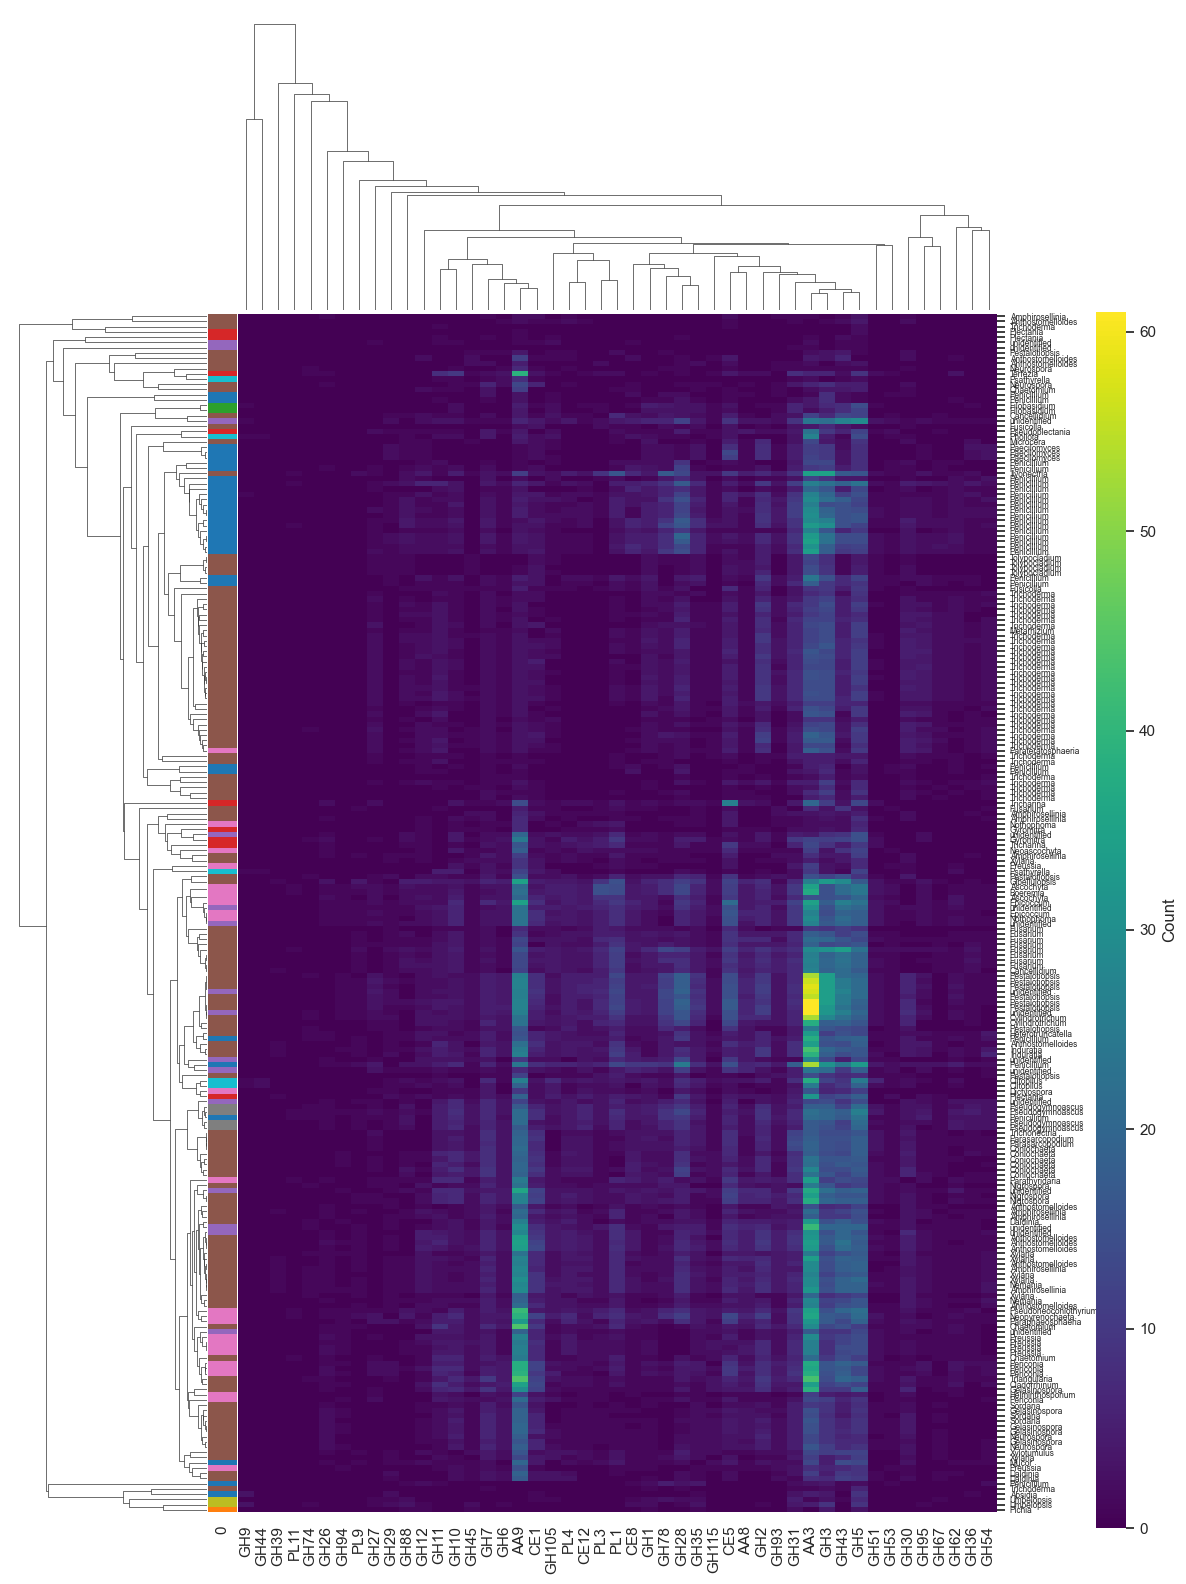

In [16]:
# create a df for colors by Order
categories = set(genus2class_mapping_dict.values())
# Create a Seaborn color palette with the number of unique categories
colors = sns.color_palette("tab10", len(categories)).as_hex()
# Create a dictionary to map categories to colors
category_color_map = dict(zip(categories, colors))
# Create a new dictionary with updated values
updated_dict = {k: category_color_map[v] if v in category_color_map else v for k, v in genus2class_mapping_dict.items()}
color_df = pd.DataFrame.from_dict([updated_dict])

cazymes_all_new_nozero = cazymes_all_new.loc[(cazymes_all_new != 0).any(axis=1)]
ax = sns.clustermap(cazymes_all_new_nozero.T, metric="cosine", cmap="viridis", yticklabels=True, xticklabels=True, figsize=(12,16), row_colors=color_df.T, cbar_pos=(0.92,0.04,0.025,0.76), cbar_kws={'label':'Count'})
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(), fontsize = 6)

plt.savefig("pcdwes_by_class_cluster.svg", format="svg", bbox_inches='tight')

### Merops
The MEROPS database holds information about peptidases (also termed proteases, proteinases and proteolytic enzymes) and the proteins that inhibit them.

In [17]:
merops = pd.read_csv("MEROPS.summary.results.csv", index_col=0)
merops_order = merops.rename(columns=order_mapping_dict, inplace=False)
merops_order = merops_order.loc[(merops != 0).any(axis=1)]
merops_all = pd.read_csv("MEROPS.all.results.csv", index_col=0)
merops_all_order = merops_all.rename(columns=order_mapping_dict, inplace=False)
merops_all_genus = merops_all.rename(columns=genus_mapping_dict, inplace=False)
#cazymes_all = cazymes_all.loc[(cazymes != 0).any(axis=1)]
merops_all_genus 

,Trichonectria,Anthostomelloides,Trichoderma,Gelasinospora,Nemania,Penicillium,Fusarium,Trichoderma,Penicillium,Nothophoma,...,Anthostomelloides,Coniochaeta,Parasarcopodium,Amphirosellinia,Xylaria,unidentified,Tricharina,Anthostomelloides,Periconia,Trichoderma
M43B,5,1,0,2,1,1,3,1,1,2,...,2,5,5,1,1,2,2,0,1,0
G01,4,4,5,3,2,2,1,5,3,1,...,5,4,4,3,3,5,0,2,0,1
S09X,29,33,46,22,36,66,74,37,35,44,...,47,26,27,34,33,42,27,11,19,18
M20X,2,2,1,1,1,2,3,2,4,0,...,0,2,2,2,2,0,0,0,0,1
S33,31,45,55,21,53,47,56,59,32,36,...,52,29,30,51,55,56,20,17,19,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
row_sum = merops.sum(axis=1)
row_avg = merops.mean(axis=1)
row_median = merops.median(axis=1)

# Print the row sum, average, and median on the same row
print("MEROPS summary statistics:")
print(f"Index{'':5}Count{'':5}Mean{'':5}Median{'':5}")
for index, row in merops.iterrows():
    #index = cazymes[i+1].index
    print(f"{index:<10}{row_sum[index]:<10}{round(row_avg[index],2):<10}{row_median[index]:<10}")

print("\nMEROPS Top20 genes statistics:")
all_row_sum = merops_all.sum(axis=1)
all_row_avg = merops_all.mean(axis=1)
all_row_median = merops_all.median(axis=1)

results = pd.DataFrame({'Row Sum': all_row_sum,
                        'Row Average': all_row_avg,
                        'Row Median': all_row_median})
results = results.sort_values(by='Row Sum', ascending=False)

results.head(20)

MEROPS summary statistics:
Index     Count     Mean     Median     
A         4012      17.52     19.0      
C         12606     55.05     60.0      
G         636       2.78      3.0       
M         20026     87.45     92.0      
N         6         0.03      0.0       
P         205       0.9       1.0       
S         30783     134.42    137.0     
T         4435      19.37     21.0      
U         62        0.27      0.0       
I         957       4.18      4.0       

MEROPS Top20 genes statistics:


,Row Sum,Row Average,Row Median
S33,8172,35.685590,35.0
S09X,8161,35.637555,34.0
A01A,3592,15.685590,17.0
C19,3197,13.960699,15.0
S08A,2874,12.550218,12.0
T01A,2726,11.903930,13.0
M38,2337,10.205240,10.0
S10,2262,9.877729,9.0
C26,2164,9.449782,10.0
S12,2079,9.078603,9.0


In [19]:
merops_order_avg = merops_order.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
merops_order_avg = merops_order_avg.drop("unidentified", axis=1)
merops_order_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales
A,16.8,25.333333,14.100000,9.0,24.666667,20.864407,12.75,22.5,20.0,6.222222,11.304348,10.0,19.470588,19.0,8.0,23.5,19.893617
C,58.6,62.666667,56.000000,53.0,64.666667,55.220339,61.25,68.0,66.0,42.888889,60.826087,21.0,52.176471,61.0,54.0,42.5,52.617021
G,1.6,3.666667,3.333333,0.0,4.000000,3.813559,1.75,2.5,3.0,0.444444,1.000000,0.0,2.529412,1.0,2.0,0.0,3.106383
M,72.8,88.666667,91.100000,64.0,122.000000,89.949153,73.75,106.5,97.0,54.111111,94.565217,48.0,72.117647,117.5,58.0,84.0,91.659574
N,0.0,0.000000,0.033333,0.0,0.000000,0.033898,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.5,0.0,0.0,0.000000
P,0.0,0.833333,0.433333,0.0,1.000000,1.661017,1.00,0.0,4.0,0.333333,0.826087,0.0,0.117647,0.5,1.0,0.0,0.808511
S,118.0,148.000000,139.233333,59.5,198.333333,143.627119,113.25,130.0,168.0,78.000000,137.521739,37.0,95.058824,181.0,96.0,79.0,146.404255
T,15.8,21.833333,18.566667,20.5,20.000000,21.050847,19.00,26.5,23.0,14.444444,18.130435,4.0,19.176471,21.5,20.0,15.5,19.787234
U,0.0,0.000000,0.400000,0.0,0.000000,0.101695,0.00,0.0,0.0,0.222222,0.260870,0.0,0.000000,2.0,2.0,0.0,0.617021
I,6.0,6.166667,4.200000,3.0,5.000000,3.576271,4.00,8.0,4.0,4.333333,4.434783,0.0,3.941176,6.0,2.0,2.0,4.340426


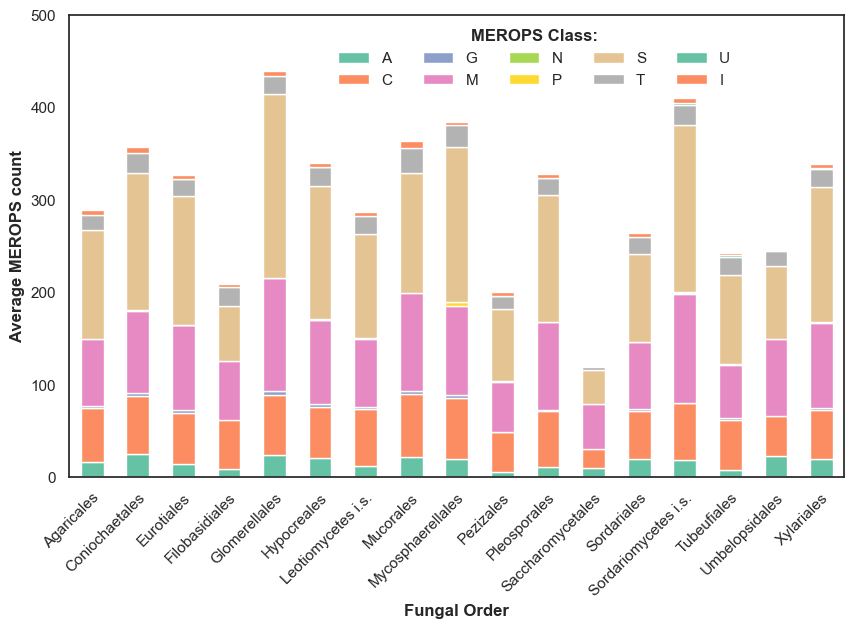

In [20]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")
sns.set_palette("Set2")
ax = merops_order_avg.T.plot.bar(stacked=True)
ax.legend(frameon=False, title="MEROPS Class:", title_fontproperties={'weight':"bold"}, loc="upper center", ncols=5, bbox_to_anchor=(0.6, 1))
ax.set_ylim([0, 500])
ax.set_ylabel("Average MEROPS count", fontproperties={'weight':"bold"})
ax.set_xlabel("Fungal Order", fontproperties={'weight':"bold"})
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
plt.savefig("MEROPS_by_class.svg", format="svg", bbox_inches='tight')

In [21]:
proteases = ["A01","S01A","S01B","S01C","S01D","S01E","S08A","S08B","S09A","S09B","S09C","S09D","S09X","S10","S12","S14","S15","S16","S24","S26","S28","S33","S41","S45","S49","M36","S53","S53","S54","S59","S64","S66"]
merops_all_new = merops_all_genus[merops_all_genus.index.isin(proteases)]
merops_all_avg = merops_all_order[merops_all_order.index.isin(proteases)]
merops_all_avg = merops_all_avg.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
merops_all_avg = merops_all_avg.drop("unidentified", axis=1)
merops_all_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales
S09X,28.4,34.000000,44.300000,16.0,64.000000,33.864407,35.75,23.0,39.0,19.666667,39.347826,11.0,23.529412,51.5,18.0,20.5,36.702128
S33,28.2,31.500000,34.300000,15.0,48.000000,42.355932,30.00,32.0,59.0,16.555556,35.782609,10.0,22.352941,55.5,18.0,15.5,39.489362
S08B,2.2,1.000000,1.033333,1.0,1.000000,1.033898,1.00,3.0,1.0,1.111111,1.043478,1.0,0.941176,1.0,2.0,2.0,0.914894
S53,8.8,8.833333,6.600000,0.0,8.000000,9.084746,3.50,4.0,9.0,3.000000,3.869565,0.0,3.882353,4.5,7.0,0.0,7.808511
S10,19.0,14.833333,9.633333,4.5,17.333333,8.542373,6.50,11.5,6.0,6.777778,11.739130,1.0,5.117647,10.0,15.0,3.0,11.638298
S01D,0.0,1.333333,1.566667,0.0,1.333333,1.525424,1.00,2.5,1.0,1.777778,1.130435,2.0,1.882353,2.0,2.0,5.0,1.361702
S08A,5.6,20.333333,5.000000,3.0,19.000000,18.593220,5.25,18.0,15.0,9.777778,8.739130,2.0,12.117647,16.5,8.0,10.5,14.106383
S28,3.4,5.833333,2.066667,1.0,4.333333,2.322034,1.25,4.0,3.0,2.666667,2.739130,0.0,3.411765,1.0,4.0,0.0,4.042553
S12,9.4,8.500000,11.833333,4.5,11.000000,10.186441,13.25,1.0,12.0,2.333333,9.695652,3.0,6.294118,13.5,4.0,2.5,8.531915
S59,1.0,1.000000,1.100000,1.0,1.000000,0.915254,1.00,1.5,1.0,0.777778,1.086957,1.0,0.941176,0.5,1.0,2.0,0.744681


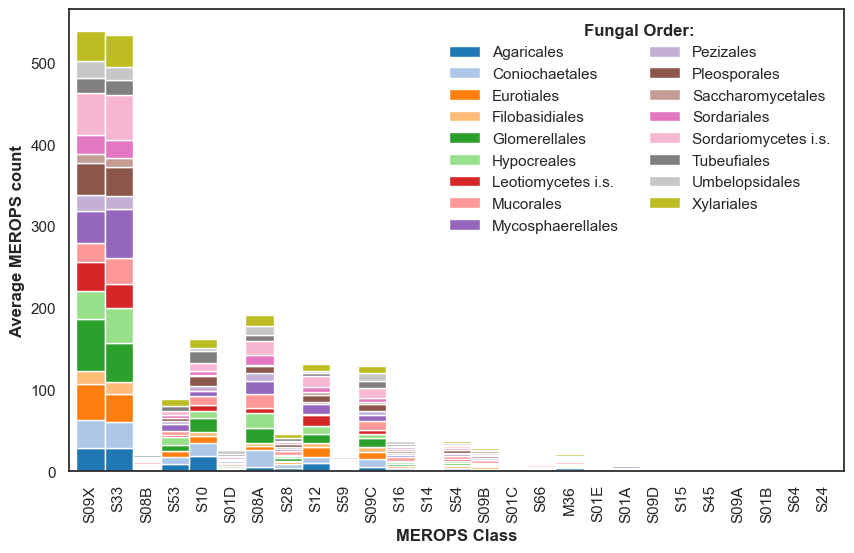

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")
sns.set_palette("tab20")
ax = merops_all_avg.plot.bar(stacked=True, width=1)
ax.legend(frameon=False, title="Fungal Order:", title_fontproperties={'weight':"bold"}, loc="best", ncols=2)
ax.set_xlabel("MEROPS Class", fontproperties={'weight':"bold"})
ax.set_ylabel("Average MEROPS count", fontproperties={'weight':"bold"})
plt.savefig("MEROPS_by_order_subset.svg", format="svg", bbox_inches='tight')

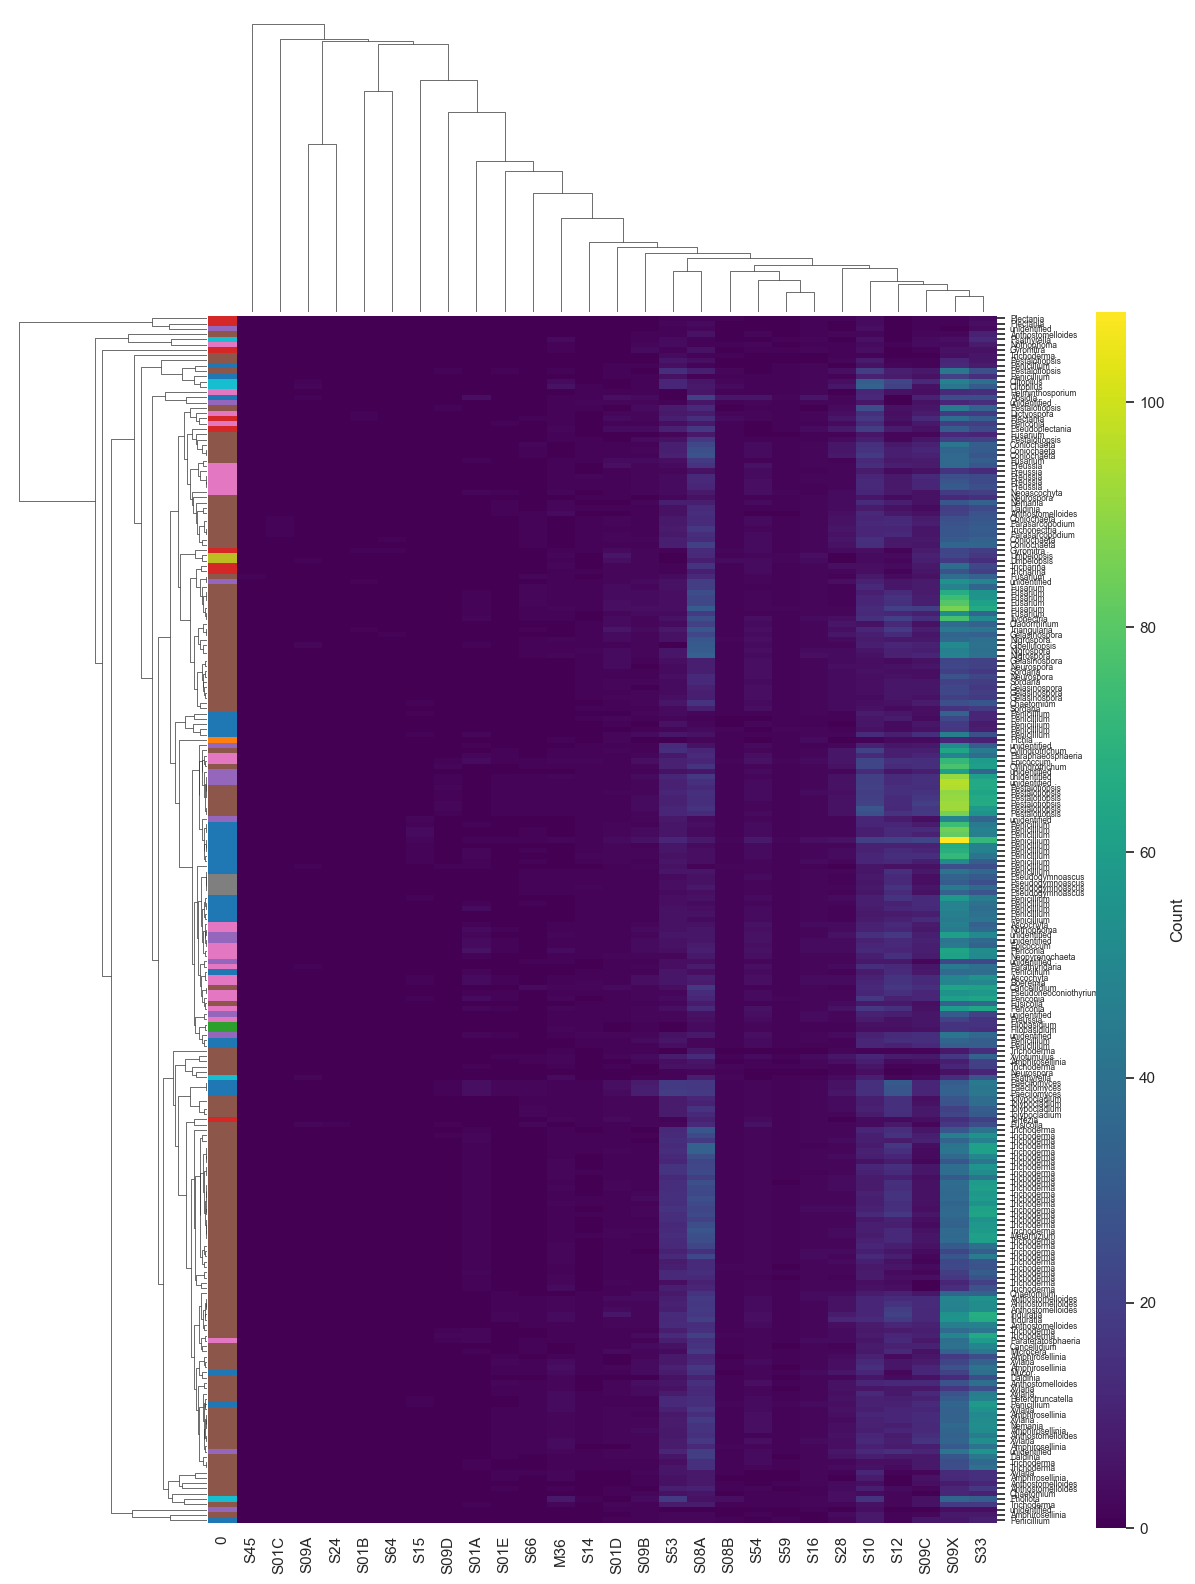

In [23]:
ax = sns.clustermap(merops_all_new.T, metric="cosine", cmap="viridis", yticklabels=True, xticklabels=True, figsize=(12,16), row_colors=color_df.T, cbar_pos=(0.92,0.04,0.025,0.76), cbar_kws={'label':'Count'})
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(), fontsize = 6)

plt.savefig("merops_cluster.svg", format="svg", bbox_inches='tight')

### Pfam

In [25]:
pfam = pd.read_csv("pfam.results.csv", index_col="descriptions")
pfam = pfam.iloc[: , 1:]
pfam_order = pfam.rename(columns=order_mapping_dict, inplace=False)
pfam_genus = pfam.rename(columns=genus_mapping_dict, inplace=False)
pfam_order_avg = pfam_order.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
pfam_genus_avg = pfam_genus.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
pfam_genus_avg

,Absidia,Amphirosellinia,Anthostomelloides,Ascochyta,Boeremia,Cancellidium,Chaetomium,Cladorrhinum,Clitopilus,Coniochaeta,...,Terfezia,Tolypocladium,Triangularia,Tricharina,Trichoderma,Trichonectria,Umbelopsis,Xylaria,Xylotumulus,unidentified
descriptions,,,,,,,,,,,,,,,,,,,,,
Staphylococcal nuclease homologue,2.0,2.000,1.7,2.0,2.0,3.0,2.666667,2.0,2.5,2.000000,...,2.0,2.0,2.0,2.0,1.921053,2.0,1.5,2.000000,2.0,1.866667
"Zinc finger, C2H2 type",59.0,10.125,15.9,20.5,20.0,10.5,17.000000,28.0,12.0,23.166667,...,23.0,19.5,28.0,21.0,16.552632,24.0,19.5,14.857143,12.0,17.800000
haloacid dehalogenase-like hydrolase,3.0,3.000,3.8,6.0,5.0,5.5,3.000000,4.0,3.0,3.666667,...,4.0,3.5,3.0,5.5,3.947368,6.0,0.5,4.428571,3.0,3.066667
"TFIIF, beta subunit HTH domain",1.0,0.500,0.9,1.0,1.0,0.5,0.666667,1.0,1.0,1.166667,...,1.0,1.0,1.0,1.0,0.710526,1.0,1.0,0.857143,1.0,1.000000
"TFIIF, beta subunit N-terminus",0.0,0.250,0.6,1.0,1.0,0.0,0.666667,0.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,0.921053,1.0,0.0,0.714286,0.0,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinc-ribbon family,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.0,0.000000
Mitochondrial translation initiation factor,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.0,0.000000
WCCH motif,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
# Merge indexes with same domains (remove brackets first)
pfam_new = pfam
pfam_new.index = pfam_new.index.str.replace(r'\(.*\)', '', regex=True)
pfam_new.index = pfam_new.index.str.replace('Ankyrin repeats', 'Ankyrin repeat')
pfam_new.index = pfam_new.index.str.strip()
pfam_new = pfam_new.groupby(level=0).sum()
pfam_new.to_csv("merged_pfam.csv")

all_row_sum = pfam_new.sum(axis=1)
all_row_avg = pfam_new.mean(axis=1)
all_row_median = pfam_new.median(axis=1)

# Print the row sum, average, and median on the same row
print("\nPFAM Top20 genes statistics:")
results = pd.DataFrame({'Row Sum': all_row_sum,
                        'Row Average': all_row_avg,
                        'Row Median': all_row_median})

results = results.sort_values(by='Row Sum', ascending=False)

results.head(20)


PFAM Top20 genes statistics:


,Row Sum,Row Average,Row Median
descriptions,,,
Ankyrin repeat,58119,253.794760,215.0
Methyltransferase domain,44810,195.676856,204.0
Major Facilitator Superfamily,43953,191.934498,190.0
short chain dehydrogenase,27578,120.427948,120.0
Tetratricopeptide repeat,25208,110.078603,102.0
Protein of unknown function,23004,100.454148,109.0
Enoyl- reductase,22926,100.113537,101.0
Domain of unknown function,20259,88.467249,96.0
KR domain,19513,85.209607,84.0


In [ ]:
top_hits = list(results.head(20).index)

pfam_order.index = pfam_order.index.str.replace(r'\(.*\)', '', regex=True)
pfam_order.index = pfam_order.index.str.replace('Ankyrin repeats', 'Ankyrin repeat')
pfam_order.index = pfam_order.index.str.strip()
pfam_order = pfam_order.groupby(level=0).sum()

pfam_order_new = pfam_order[pfam_order.index.isin(top_hits)]

#pfam_order_new.index = pfam_order_new.index.str.replace(r'\(.*\)', '', regex=True)
#pfam_order_new.index = pfam_order_new.index.str.strip()
#pfam_order_new = pfam_order_new.groupby(level=0).sum()
pfam_order_avg = pfam_order_new.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
pfam_order_sum = pfam_order_new.groupby(level=0, axis=1).apply(lambda x: x.apply(sum_merge, axis=1))
pfam_order_avg = pfam_order_avg.drop("unidentified", axis=1)
pfam_order_sum.loc['Ankyrin repeat'].sum()
pfam_order_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales
descriptions,,,,,,,,,,,,,,,,,
AAA domain,51.4,67.166667,56.666667,44.0,53.333333,60.915254,49.50,58.5,72.0,45.333333,62.478261,7.0,58.058824,69.0,45.0,39.5,55.234043
Ankyrin repeat,193.4,265.666667,232.233333,34.0,173.666667,242.711864,317.75,187.5,354.0,737.666667,183.521739,84.0,237.705882,236.5,525.0,149.5,243.021277
Cytochrome P450,59.4,71.333333,68.200000,9.0,107.000000,45.000000,42.75,38.5,63.0,32.111111,73.695652,0.0,53.705882,59.5,26.0,18.5,90.787234
Domain of unknown function,72.8,120.000000,88.533333,49.0,108.666667,85.101695,92.25,90.0,97.0,67.111111,94.782609,17.0,96.941176,115.0,73.0,60.0,88.468085
Enoyl- reductase,46.0,119.666667,110.833333,39.5,135.000000,110.627119,84.50,52.0,127.0,46.444444,109.043478,18.0,60.529412,131.5,44.0,53.5,108.936170
FAD binding domain,26.0,75.333333,73.700000,16.5,107.333333,63.898305,52.75,35.0,81.0,34.000000,75.304348,7.0,56.470588,78.5,26.0,31.0,81.127660
Fungal Zn binuclear cluster domain,10.0,95.833333,77.233333,31.0,91.000000,87.576271,50.00,25.5,119.0,25.444444,48.478261,1.0,49.235294,48.0,11.0,10.5,57.744681
Fungal specific transcription factor domain,19.6,126.500000,100.966667,32.0,109.333333,98.457627,64.25,35.5,128.0,40.666667,69.826087,4.0,54.588235,90.5,31.0,12.0,63.255319
Helicase conserved C-terminal domain,50.8,74.333333,63.066667,55.0,62.333333,57.016949,73.50,69.0,67.0,54.666667,61.782609,24.0,62.294118,53.0,43.0,46.0,50.148936


In [26]:
sns.set(style="white")
sns.set_palette("tab20")
ax = pfam_order_avg.plot.bar(stacked=True, width=1)
ax.legend(frameon=False, title="Fungal Order:", title_fontproperties={'weight':"bold"}, ncols=5, loc="lower center", bbox_to_anchor=(0.5,-0.82))
ax.set_xlabel("PFAM domains", fontproperties={'weight':"bold"})
ax.set_ylabel("Average PFAM domain count", fontproperties={'weight':"bold"})
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
plt.savefig("PFAM_by_order_subset.svg", format="svg", bbox_inches='tight')

KeyboardInterrupt: 

### Transcription factors

In [ ]:
tf = pd.read_csv("transcription_factor_counts.csv", index_col="Description")
tf = tf.iloc[: , 2:]
tf_order = tf.rename(columns=order_mapping_dict, inplace=False)
tf_order = tf_order.loc[(tf_order > 0).any(axis=1)]

tf_order_avg = tf_order.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
tf_order_sum = tf_order.groupby(level=0, axis=1).apply(lambda x: x.apply(sum_merge, axis=1))
tf_order_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales,unidentified
Description,,,,,,,,,,,,,,,,,,
NF-X1-type zinc finger,0.00,1.000000,0.266667,0.0,0.333333,0.322034,0.75,1.0,1.0,0.555556,0.347826,1.0,0.588235,0.5,0.0,1.0,0.106383,0.285714
Mating-type protein MAT alpha-1 HMG-Box,0.00,1.166667,0.266667,0.0,0.000000,0.372881,1.00,0.0,0.0,0.555556,0.565217,0.0,0.941176,0.0,0.0,0.0,0.000000,0.500000
DDT domain,0.75,1.000000,0.833333,1.0,1.000000,0.898305,1.00,2.0,1.0,0.666667,0.782609,1.0,0.882353,1.0,1.0,2.0,0.765957,0.928571
CCR4-Not complex component,1.00,1.000000,1.033333,1.0,1.000000,0.983051,1.00,2.5,1.0,0.444444,1.000000,0.0,0.882353,1.5,0.0,2.0,0.914894,0.928571
Putative FMN-binding domain,0.25,0.833333,2.066667,1.0,1.666667,1.322034,1.00,0.0,2.0,0.000000,0.782609,0.0,0.117647,4.0,0.0,0.0,0.553191,0.857143
TFIIH C1-like domain,0.00,1.000000,0.366667,0.0,1.333333,0.525424,0.50,1.0,1.0,0.555556,0.391304,0.0,0.588235,1.0,0.0,0.0,0.553191,0.571429
MIZ zinc finger,0.75,2.833333,2.466667,1.0,2.333333,1.644068,2.50,2.5,2.0,2.222222,2.434783,1.0,2.352941,1.5,2.0,1.5,2.021277,2.714286
TEA/ATTS domain family,1.75,1.000000,1.166667,0.5,0.333333,0.644068,0.75,0.0,1.0,0.888889,0.739130,0.0,0.647059,1.0,2.0,0.0,0.510638,0.857143
Helix-turn-helix,1.50,1.833333,1.100000,0.5,1.000000,1.186441,1.00,1.5,1.0,0.888889,1.478261,0.0,0.882353,12.5,1.0,0.5,0.808511,1.071429


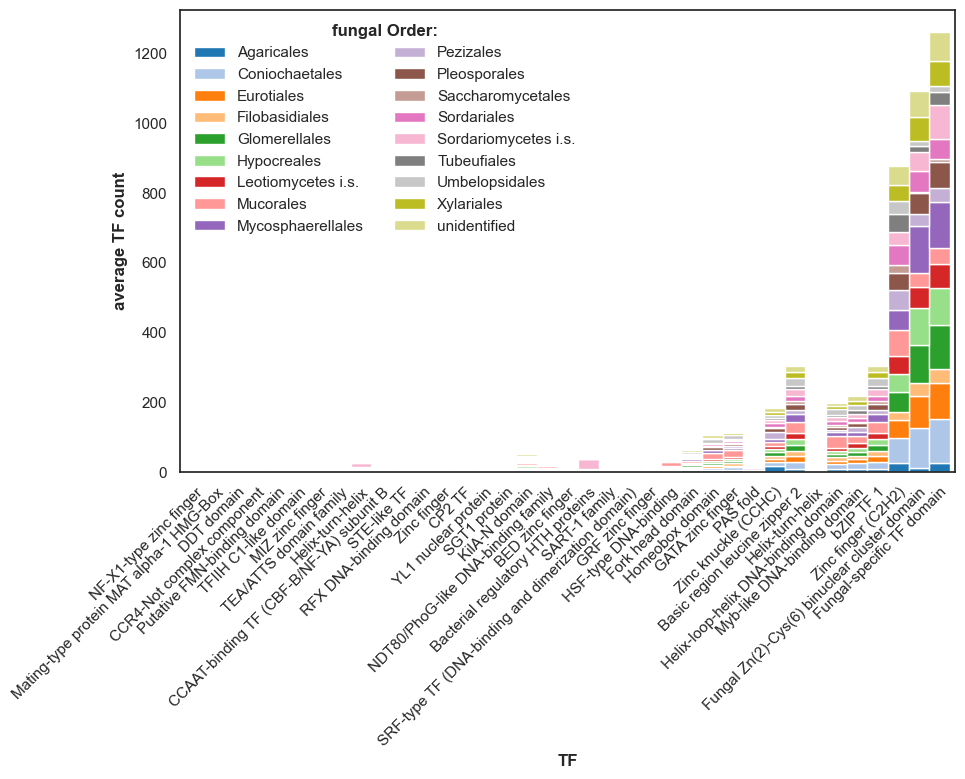

In [ ]:
sns.set(style="white")
sns.set_palette("tab20")
ax = tf_order_avg.plot.bar(stacked=True, width=1)
ax.legend(frameon=False, title="Fungal Order:", title_fontproperties={'weight':"bold"}, ncols=2)#, loc="lower center", bbox_to_anchor=(0.5,-0.82))
ax.set_xlabel("TF", fontproperties={'weight':"bold"})
ax.set_ylabel("Average TF count", fontproperties={'weight':"bold"})
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
plt.savefig("TF_by_order_subset.svg", format="svg", bbox_inches='tight')

### COGs

In [ ]:
cogs = pd.read_csv("COGs.all.results.csv", index_col=0)
cogs_order = cogs.rename(columns=order_mapping_dict, inplace=False)
cogs_order = cogs_order.loc[(cogs_order > 0).any(axis=1)]

cogs_order_avg = cogs_order.groupby(level=0, axis=1).apply(lambda x: x.apply(mean_merge, axis=1))
cogs_order_sum = cogs_order.groupby(level=0, axis=1).apply(lambda x: x.apply(sum_merge, axis=1))
cogs_order_avg

,Agaricales,Coniochaetales,Eurotiales,Filobasidiales,Glomerellales,Hypocreales,Leotiomycetes i.s.,Mucorales,Mycosphaerellales,Pezizales,Pleosporales,Saccharomycetales,Sordariales,Sordariomycetes i.s.,Tubeufiales,Umbelopsidales,Xylariales,unidentified
(C) Energy production and conversion,315.0,395.666667,427.633333,276.0,546.333333,378.254237,383.00,423.5,413.0,242.777778,389.043478,187.0,333.352941,639.0,344.0,302.0,425.446809,378.066667
(S) Function unknown,2085.8,2644.500000,2351.833333,1373.5,3064.000000,2503.898305,2426.50,2588.5,2761.0,1641.333333,2508.913043,782.0,2337.411765,3417.0,1949.0,1439.5,2579.659574,2379.200000
(K) Transcription,381.8,391.666667,433.600000,342.5,435.333333,382.372881,399.00,591.0,374.0,309.444444,376.086957,209.0,365.588235,807.0,396.0,407.5,362.808511,350.866667
"(J) Translation, ribosomal structure and biogenesis",380.8,401.500000,415.366667,379.5,438.000000,384.813559,425.00,561.5,412.0,331.111111,412.260870,245.0,370.117647,421.0,413.0,441.5,387.361702,377.800000
(T) Signal transduction mechanisms,586.6,385.833333,397.000000,437.5,454.666667,413.745763,435.50,800.0,436.0,329.444444,431.434783,348.0,369.647059,691.5,467.0,611.0,386.468085,385.266667
(P) Inorganic ion transport and metabolism,194.8,255.000000,318.866667,205.0,368.666667,288.508475,294.75,341.0,295.0,160.000000,296.217391,167.0,215.176471,594.0,215.0,257.0,249.680851,251.866667
"(L) Replication, recombination and repair",331.2,277.333333,279.566667,259.5,297.333333,262.508475,313.75,336.5,301.0,298.000000,277.652174,133.0,254.529412,391.5,404.0,218.5,273.127660,253.000000
(A) RNA processing and modification,380.4,333.666667,336.866667,337.0,353.666667,339.220339,334.00,433.5,372.0,285.000000,350.739130,195.0,329.117647,345.0,381.0,360.5,315.170213,309.800000
(Z) Cytoskeleton,155.8,142.166667,157.666667,129.5,162.000000,150.101695,186.25,233.0,147.0,143.333333,168.217391,113.0,140.882353,156.0,189.0,197.5,148.680851,141.933333
(F) Nucleotide transport and metabolism,94.8,127.833333,121.800000,97.0,155.666667,129.644068,116.50,131.0,149.0,91.888889,120.695652,55.0,107.705882,163.0,129.0,94.0,118.680851,116.000000


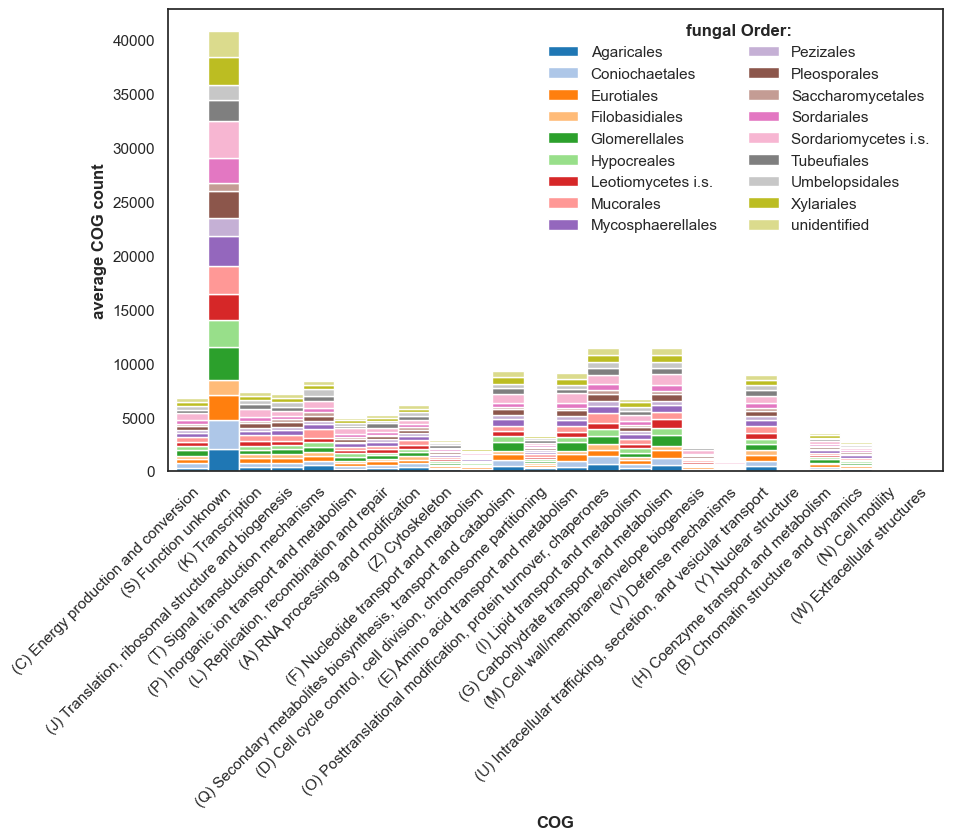

In [ ]:
sns.set(style="white")
sns.set_palette("tab20")
ax = cogs_order_avg.plot.bar(stacked=True, width=1)
ax.legend(frameon=False, title="Fungal Order:", title_fontproperties={'weight':"bold"}, ncols=2)#, loc="lower center", bbox_to_anchor=(0.5,-0.82))
ax.set_xlabel("COG", fontproperties={'weight':"bold"})
ax.set_ylabel("Average COG count", fontproperties={'weight':"bold"})
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
plt.savefig("cogs_by_order_subset.svg", format="svg", bbox_inches='tight')